In [1]:
import numpy as np
import pandas as pd
import nltk

In [43]:
df = pd.read_csv('spam.csv') # Reading the file onto python
df.shape                     #Gives you the no. of rows and columns in the dataset

(5572, 5)

In [44]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
669,ham,Did u receive my msg?,NaN,NaN,NaN
4179,ham,"swhrt how u dey,hope ur ok, tot about u 2day.l...",NaN,NaN,NaN
5150,ham,Happy new year to u and ur family...may this n...,NaN,NaN,NaN
4652,ham,Lol yes. But it will add some spice to your day.,NaN,NaN,NaN
3760,ham,Was just about to ask. Will keep this one. May...,NaN,NaN,NaN


In [30]:
# 1. Data Cleaning
# 2. EDA
# 3. Text preprocessing
# 4. Model Building
# 5. Evaludation
# 6. Improvement
# 7. Website
# 8. Deploy in production

In [45]:
# 1. Data Cleaning
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will �_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [46]:
# let'd drop the last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [47]:
df.sample(5)

,v1,v2
4449,ham,"Awesome, be there in a minute"
3777,ham,Once a fishrman woke early in d mrng. It was v...
3558,spam,URGENT! We are trying to contact U Todays draw...
2792,ham,Not from this campus. Are you in the library?
719,ham,Macha dont feel upset.i can assume your mindse...


In [51]:
# Let's rename the columns
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [64]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])
df.sample(10)

,Target,Text
2909,0,How do you guys go to see movies on your side.
1599,0,"Yeah probably, I still gotta check out with leo"
2542,0,Aiyo please �_ got time meh.
1977,1,Reply to win �100 weekly! Where will the 2006 ...
654,0,Did u got that persons story
242,0,"Okay. No no, just shining on. That was meant t..."
2355,0,"Hello, my love ! How went your day ? Are you a..."
772,0,"idc get over here, you are not weaseling your ..."
2392,0,"Thanks da thangam, i feel very very happy dear..."
2895,1,pdate_Now - Double mins and 1000 txts on Orang...


In [66]:
#Check for missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [68]:
#Check for duplicates
df.duplicated().sum()

403

In [72]:
# let's remove the duplicates now
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [75]:
df.shape

(5169, 2)

In [78]:
# 2. EDA
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

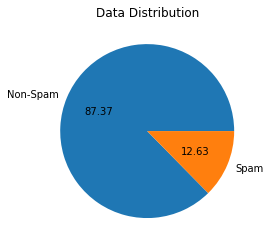

In [82]:
import matplotlib.pyplot as plt
plt.title('Data Distribution')
plt.pie(df['Target'].value_counts(),labels=['Non-Spam','Spam'],autopct="%0.2f")
plt.show()


In [84]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\n328791\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [113]:
df['characters'] = df['Text'].apply(len)
df.rename(columns={'characters':'num_characters'},inplace=True)
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [114]:
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [117]:
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [119]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

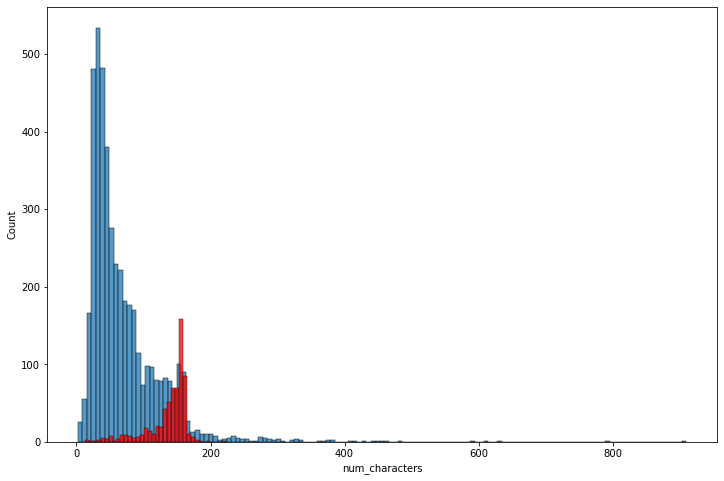

In [126]:
import seaborn as sns
plt.figure(figsize = (12,8))
sns.histplot(df[df['Target'] == 0]['num_characters'])
sns.histplot(df[df['Target'] == 1]['num_characters'],color='red')


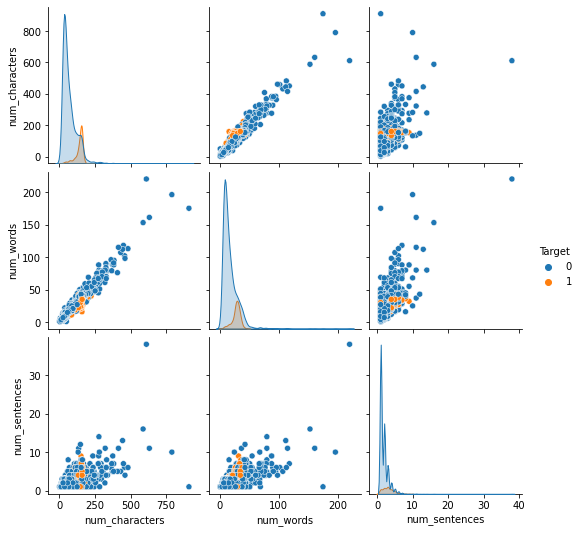

In [127]:
sns.pairplot(df,hue='Target')

<AxesSubplot:>

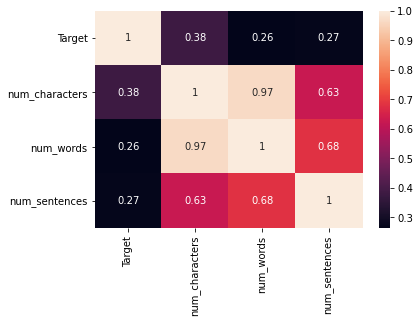

In [131]:
sns.heatmap(df.corr(),annot=True)

In [137]:
# 3. Text preprocessing
#   •Lower Case
#   •Tokenization
#   •Removing special Characters
#   •Removing Stop words and punctuation
#   •Stemming   